In [2]:
import pandas as pd
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from collections import Counter


In [3]:
# transform = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.ToTensor()
# ])


In [4]:
# dataset_path = "./Data/"
# dataset = datasets.ImageFolder(root = dataset_path, transform = transform)

In [5]:
# print("Classes:", dataset.classes)
# print("Number of images:", len(dataset))

Classes: ['Firstset', 'Secondset']
Number of images: 1224


In [6]:
# class_counts = Counter([label for _, label in dataset])
# for idx, class_name in enumerate(dataset.classes):
#     print(f"{class_name}: {class_counts[idx]} images")

Firstset: 528 images
Secondset: 696 images


In [7]:
import os
from collections import Counter
from PIL import Image

root_dir = "./Data/"

def count_images(directory):
    image_count = 0
    for root, _, files in os.walk(directory):
        image_count += len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    return image_count

# List top-level sets
sets = [item for item in os.listdir(root_dir) if not item.startswith('.')]

for dr in sets:
    path = os.path.join(root_dir, dr)
    print(f"\n{dr}:")
    
    # Get subdirectories under each set
    subdirs = [item for item in os.listdir(path) if os.path.isdir(os.path.join(path, item)) and not item.startswith('.')]
    
    for sd in subdirs:
        sub_path = os.path.join(path, sd)
        img_count = count_images(sub_path)
        print(f"   {sd}: {img_count} images")



Firstset:
   100xNormalOralCavityHistopathologicalImages: 89 images
   100xOSCCHistopathologicalImages: 439 images

Secondset:
   400xNormalOralCavityHistopathologicalImages: 201 images
   400xOSCCHistopathologicalImages: 495 images


In [42]:
dataloader = DataLoader(dataset, batch_size = 8, shuffle=True)

In [43]:
from PIL import Image
import random 
img_path = "./Data/Firstset/100xNormalOralCavityHistopathologicalImages/Normal_100x_"
r = random.randint(1, 100)
image = Image.open(f'{img_path}{r}.jpg')
image.show()

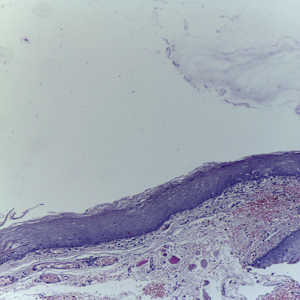

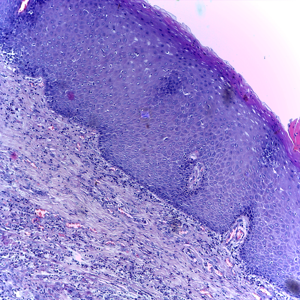

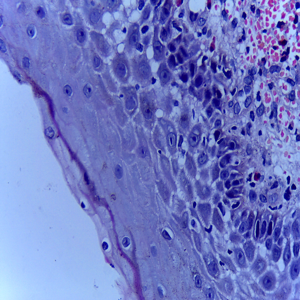

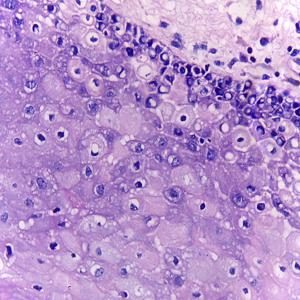

In [44]:
from IPython.display import display, HTML
from PIL import Image
import os
import random
root_dir = './Data/'
sets = [item for item in os.listdir(root_dir) if not item.startswith('.')]

display_width = 300
display_height = 300

for dr in sets:
    path = root_dir + dr
    subdirs = [item for item in os.listdir(path) if not item.startswith('.')]
    
    r = random.randint(1, 100)
    for sd in subdirs:
        path1 = os.path.join(path, sd)
        images = [image for image in os.listdir(path1) if not image.startswith('.')]
        
        random_image = random.choice(images)
        random_image_path = os.path.join(path1, random_image)
        
        image = Image.open(random_image_path)
        image = image.resize((display_width, display_height))
        
        display(HTML(f"<h4 style = 'font-family:sans-serif'>{sd}</h4>"))
        display(image)
        

In [1]:
# path1 = './Data/Firstset/100xNormalOralCavityHistopathologicalImages'

# for image in os.listdir(path1):
#     print(image)
#     # break